<h2>Projeto: Ligações para o 911</h2>
<p>Para este projeto estaremos analisando alguns dados de chamadas para o 911</p>
<ul>
    <li>lat: Variável string: Latitude</li>
    <li>lng: Variável string: Longitude</li>
    <li>des: Variável String, Descrição da Chamada de Emergência</li>
    <li>zip: Variável String, CEP</li>
    <li>titulo: Variável String, Titulo</li>
    <li>timeStamp: Variável String, AAAA-MM-DD HH:MM:SS</li>
    <li>twp: Variável String, Township</li>
    <li>addr: Variável String, Endereço</li>
    <li>e: Variável String, variável Dummy (sempre 1)</li>
</ul>

<h3>Dados e Configuração</h3>
 <h4>importar numpy e pandas</h4>

In [1]:
import numpy as np
import pandas as pd

<h4>importe as bibliotecas de visualização e configure %matplotlib inline</h4>

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<h4>Leia o arquivo csv como um dataframe chamado df</h4>

In [3]:
df = pd.read_csv('911.csv')

In [5]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


<h3>Perguntas básicas</h3>
<h4>Quais são os top 5 CEPs nas chamadas 911?</h4>

In [8]:
df['zip'].value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

<h4>Quais `são os 5 principais municípios nas chamadas 911?</h4>

In [10]:
df['twp'].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

<h4>De uma olhada na coluna 'title'. Quantos códigos de titulos exclusivos existem?</h4>

In [14]:
len(df['title'].unique())

110

<h3>Criando novos recursos</h3>
<p>Na coluna 'title' existem 'Razões/Departamentos' especificados antes do código do titulo, que são 'EMS', 'Fire' e 'Traffic'. Use apply com uma expressão lambda personalizada para criar uma nova coluna chamada 'Razão' que contém esse valor de String.</p>

In [17]:
df['title'].iloc[0].split(':')[0]

'EMS'

In [18]:
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

In [19]:
df['Reason']

0            EMS
1            EMS
2           Fire
3            EMS
4            EMS
          ...   
99487    Traffic
99488    Traffic
99489        EMS
99490        EMS
99491    Traffic
Name: Reason, Length: 99492, dtype: object

<h4>Qual é o motivo mais comum para uma chamada do 911 com base nessa nova coluna?</h4>

In [21]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

<h4>Agora use Seaborn para criar um countplot de chamadas 911 baseadas neta nova coluna</h4>

<AxesSubplot:xlabel='Reason', ylabel='count'>

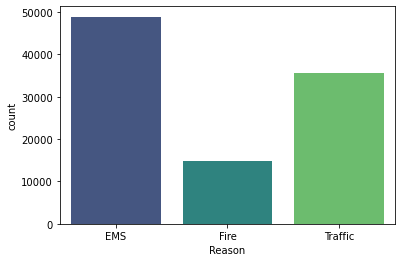

In [22]:
sns.countplot(x='Reason', data=df, palette='viridis')

<h4>Agora vamos começar a focar em informações de tempo. Qual é o tipo de dados dos objetos na coluna TimeStamp?</h4>

In [29]:
type(df['timeStamp'].iloc[1])

str

<h4>Voce deveria ter notado que esses timestamps ainda são strings. Use pd.to_datetime para converter a coluna de strings em objetos DateTime</h4>

In [30]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [32]:
type(df['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [38]:
df['Hour'] = df['timeStamp'].apply(lambda x: x.hour)
df['Month'] = df['timeStamp'].apply(lambda x: x.month)
df['Day of Week'] = df['timeStamp'].apply(lambda x: x.dayofweek)

In [39]:
df['Month'].head(9)

0    12
1    12
2    12
3    12
4    12
5    12
6    12
7    12
8    12
Name: Month, dtype: int64

<h4>Use o .map() com este dicionário para mapear os nomes das sequencia reais para os dias da semana:</h4>

In [40]:
dmap = {0: 'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}

In [41]:
df['Day Of Week'] = df['Day of Week'].map(dmap)

In [44]:
df['Day Of Week']

0        Thu
1        Thu
2        Thu
3        Thu
4        Thu
        ... 
99487    Wed
99488    Wed
99489    Wed
99490    Wed
99491    Wed
Name: Day Of Week, Length: 99492, dtype: object

<h4>Agora use Seaborn para criar um countplot da coluna 'Day of Week' com a tonalidade baseada na coluna Reason</h4>

<AxesSubplot:xlabel='Day of Week', ylabel='count'>

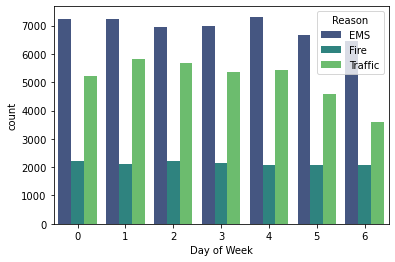

In [47]:
sns.countplot(x='Day of Week', data=df, hue='Reason', palette='viridis')

<h4>Agora faça o mesmo para o mês</h4>

<AxesSubplot:xlabel='Month', ylabel='count'>

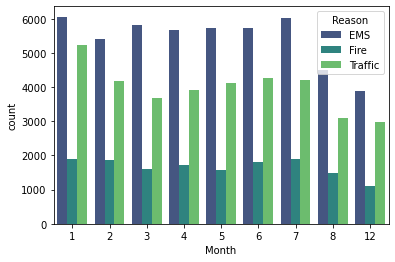

In [48]:
sns.countplot(x='Month', data=df, hue='Reason', palette='viridis')